# **NATURAL LANGUAGE PROCESSING**

## Assignment - I

###Text Generation

Downloading necessary tokeniser

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Import Libraries and Corpuses

In [ ]:
import re
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures


Reading and Preprocessing Corpus

In [ ]:
# Read the corpus from a text file
corpus_file = "/content/Mythology.txt"  # Replace with the path to your text file

with open(corpus_file, "r", encoding="utf-8") as file:
    corpus = file.read()

# Preprocess the corpus (tokenization and cleaning)
corpus = re.sub(r'\W', ' ', corpus)  # Remove non-alphanumeric characters
corpus = corpus.lower()  # Convert to lowercase
words = corpus.split()  # Tokenization

# Initialize lists to store data
N_values = []  # Total number of words in the corpus
V_values = []  # Vocabulary size

# Analyze the corpus in chunks or as a whole, depending on your data
for i in range(1, len(words) + 1):
    subset = words[:i]
    N_values.append(len(subset))
    V_values.append(len(set(subset)))  # Count unique words

Heap's Law


Estimated K: 13.913969101583758
Estimated β: 0.5713320797090935


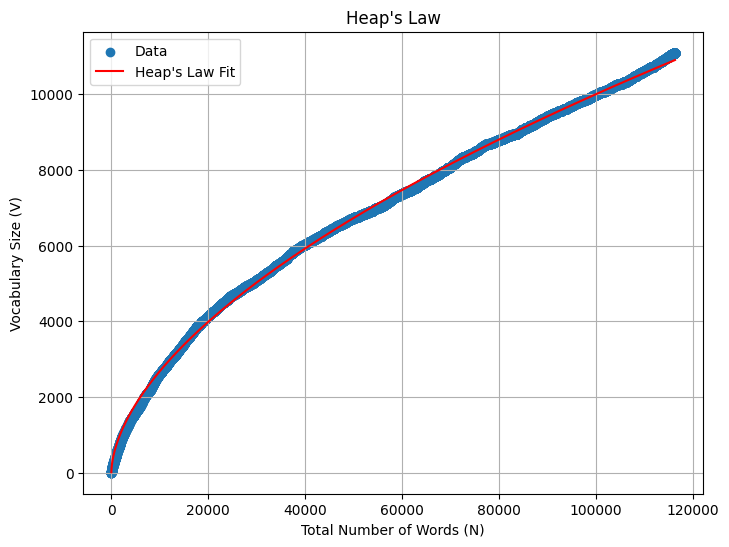

In [ ]:

# Function for Heap's Law model
def heap_model(N, K, beta):
    return K * N ** beta

# Fit Heap's Law model to the data
params, covariance = curve_fit(heap_model, N_values, V_values)

K, beta = params  # Extract K and beta values

# Print the estimated parameters
print("Estimated K:", K)
print("Estimated β:", beta)

# Create a plot to visualize Heap's Law
plt.figure(figsize=(8, 6))
plt.scatter(N_values, V_values, label="Data")
plt.plot(N_values, heap_model(np.array(N_values), K, beta), 'r-', label="Heap's Law Fit")
plt.xlabel("Total Number of Words (N)")
plt.ylabel("Vocabulary Size (V)")
plt.title("Heap's Law")
plt.legend()
plt.grid()
plt.show()


Zifs Law and Graphical Representation

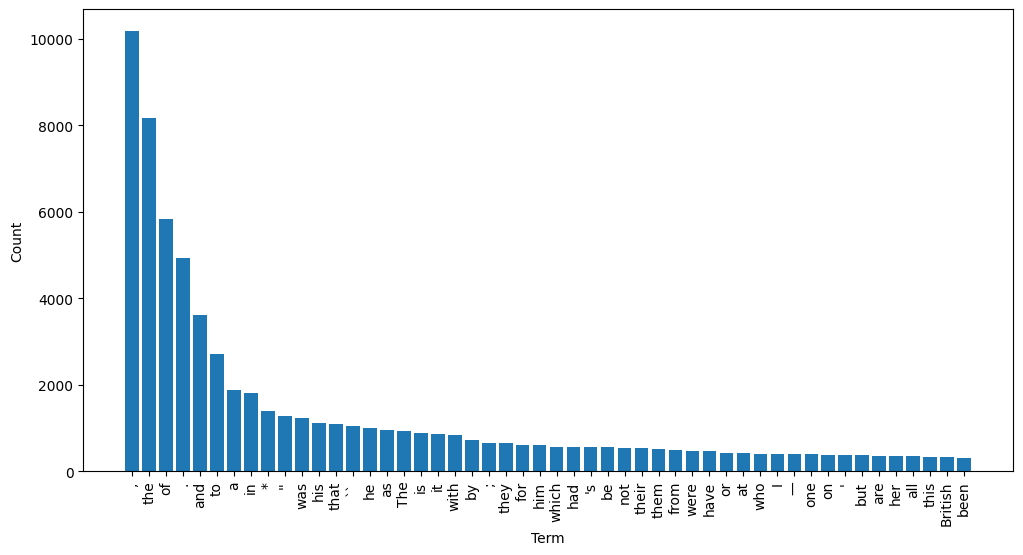

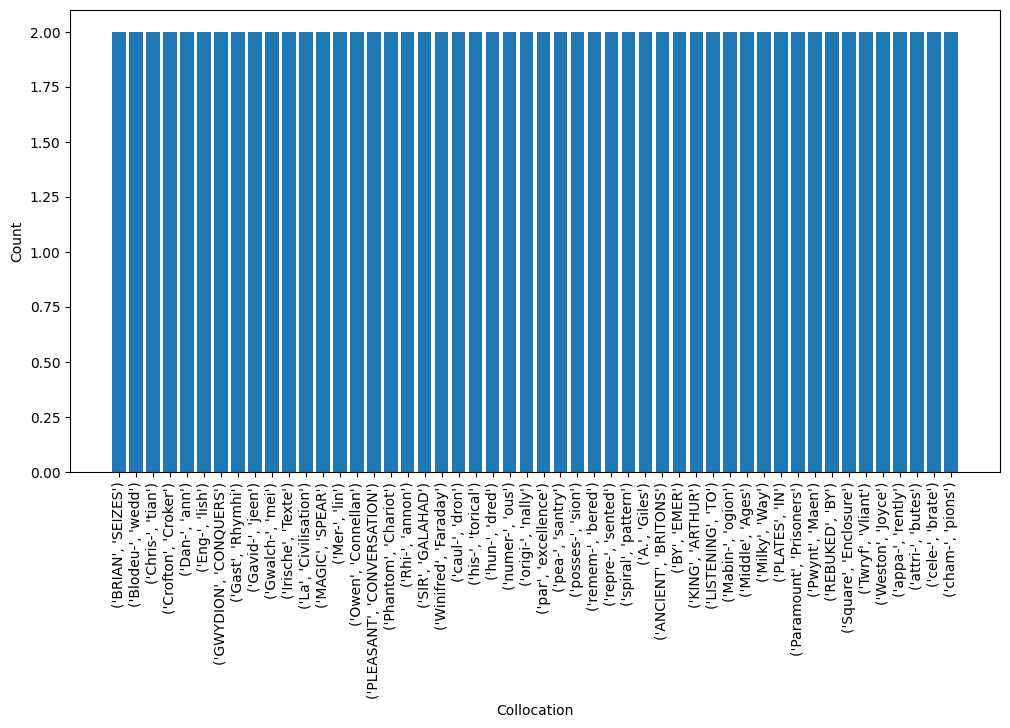

In [ ]:

file_path = "/content/Mythology.txt"

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

tokens = word_tokenize(text)

# Calculate the frequency distribution of words
word_freq = nltk.FreqDist(tokens)

# Sort words by frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Plot terms vs their count
terms, counts = zip(*sorted_word_freq[:50])  # Adjust the number as needed
plt.figure(figsize=(12, 6))
plt.bar(range(len(terms)), counts)
plt.xticks(range(len(terms)), terms, rotation=90)
plt.ylabel('Count')
plt.xlabel('Term')
plt.show()

# Calculate bigram collocations
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Choose a scoring method (e.g., PMI) and filter collocations
finder.apply_freq_filter(2)  # Adjust the minimum frequency as needed
collocations = finder.nbest(bigram_measures.pmi, 50)  # Adjust the number as needed

# Plot top 50 collocations and their count
collocation_counts = [finder.ngram_fd[collocation] for collocation in collocations]
plt.figure(figsize=(12, 6))
plt.bar(range(len(collocations)), collocation_counts)
plt.xticks(range(len(collocations)), collocations, rotation=90)
plt.ylabel('Count')
plt.xlabel('Collocation')
plt.show()


In [ ]:
# Step 1: Input a Keyword and the Number of N-Grams
keyword = input("Enter the keyword: ")  # Prompt the user to enter a keyword.
n_gram_type = input("Enter the number of n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.): ")  # Prompt the user to enter the desired n-gram type.

try:
    n = int(n_gram_type)  # Convert the user input for n-grams to an integer.
except ValueError:
    print("Invalid input for n-grams. Please enter a valid integer.")  # Handle an exception if the input is not a valid integer.
    exit()  # Exit the program.

# Step 3: Tokenize and Generate N-Grams
nltk.download('punkt')  # Download the 'punkt' tokenizer models for tokenization.
from nltk.tokenize import word_tokenize  # Import the word_tokenize function for tokenization.

# Tokenize the text
tokens = word_tokenize(text)  # Tokenize the 'text' and store the result in the 'tokens' variable.

# Generate n-grams
n_grams = list(ngrams(tokens, n))  # Generate n-grams of the specified size and store them in 'n_grams'.

# Step 4: Filter N-Grams Based on Input Keyword
keyword_n_grams = [gram for gram in n_grams if keyword in gram]  # Filter n-grams containing the specified keyword.

# Step 5: Generate Text Around Input Keyword
text_around_keyword_n_grams = [" ".join(gram) for gram in keyword_n_grams]  # Combine the n-grams into strings.

# Step 6: Choose and Display the Generated Text
if text_around_keyword_n_grams:  # Check if there are any n-grams containing the keyword.
    chosen_text = text_around_keyword_n_grams[0]  # Select the first such n-gram.
    print(f"Text centered around the keyword '{keyword}' in {n}-grams:")  # Print a message with the keyword and n-gram type.
    print(chosen_text)  # Print the selected text.
else:
    print(f"No {n}-gram found centered around the keyword '{keyword}'.")  # Inform the user if no matching n-grams were found.


Enter the keyword: Her
Enter the number of n-grams (e.g., 2 for bigrams, 3 for trigrams, etc.): 4


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text centered around the keyword 'Her' in 4-grams:
ninth-century Irish glossary.^ Her


In [ ]:
n_grams = list(ngrams(tokens, n))

# Count unique n-grams
unique_ngrams = set(n_grams)

# Calculate the total number of possible n-grams
if n == 1:
    total_possible_ngrams = len(set(tokens))
else:
    total_possible_ngrams = len(set(ngrams(tokens, n)))

# Calculate the sparsity
sparsity = len(unique_ngrams) / total_possible_ngrams

# Print the results
print(f"Number of unique {n}-grams: {len(unique_ngrams)}")
print(f"Total possible {n}-grams: {total_possible_ngrams}")
print(f"Sparsity for {n}-grams: {sparsity:.4f}")

# Comment on sparsity
if sparsity < 0.5:
    print("Low sparsity: Many of the possible n-grams are observed.")
else:
    print("High sparsity: Only a fraction of possible n-grams are observed.")

Number of unique 4-grams: 127938
Total possible 4-grams: 127938
Sparsity for 4-grams: 1.0000
High sparsity: Only a fraction of possible n-grams are observed.


In [ ]:
language_model = {}

# Test dataset (list of sequences)
test_dataset = ["this is a test", "another example", "more text to evaluate"]

# Initialize variables for perplexity calculation
log_likelihood = 0
total_words = 0

# Calculate log-likelihood and count total words in the test dataset
for sequence in test_dataset:
    words = sequence.split()
    total_words += len(words)
    for i in range(len(words) - 1):
        word1, word2 = words[i], words[i + 1]
        # Replace with language model probability estimate
        word_pair_prob = language_model.get((word1, word2), 1e-10)  # Use a small value for unseen pairs
        log_likelihood += -math.log2(word_pair_prob)

# Calculate perplexity
perplexity = 2 ** (log_likelihood / total_words)
print(f"Perplexity: {perplexity}")


Perplexity: 10000000.00000002


## REPORT


**Corpus Chosen:**
- The code begins by reading a corpus from a text file named "Mythology.txt."

**Preprocessing the Corpus:**
- The corpus is preprocessed through the following steps:
  - Non-alphanumeric characters are removed.
  - The text is converted to lowercase.
  - Tokenization is performed, splitting the text into words.

**Heap's Law Model:**
- Heap's Law, a formula that describes the relationship between the size of a vocabulary (V) and the number of tokens (N) in a text, is applied to the data.
- The code estimates the parameters K and beta for Heap's Law through curve fitting, and these parameters are printed.
- A plot is created to visualize Heap's Law with the data and the fitted curve.

**Term Frequency Analysis:**
- A frequency distribution of words is calculated.
- The top 50 terms are sorted by frequency and plotted in a bar chart.

**Bigram Collocations:**
- Bigram collocations are extracted from the corpus using the Pointwise Mutual Information (PMI) scoring method.
- The top 50 collocations are sorted by their frequency and plotted in a bar chart.

**N-Gram Analysis:**
- The user is prompted to input a keyword and the desired n-gram size (e.g., bigrams, trigrams).
- Tokenization is performed, and n-grams of the specified size are generated.
- N-grams containing the keyword are filtered.
- The text centered around the keyword in the selected n-gram is displayed, or a message is shown if no matching n-grams are found.

**N-Gram Sparsity Analysis:**
- Sparsity of the n-grams is calculated by comparing the number of unique n-grams to the total possible n-grams.
- The results are printed, and based on the sparsity value, it's commented whether it's low or high.

**Language Model and Perplexity Calculation:**
- A simple language model is used to calculate perplexity for a test dataset.
- The test dataset is provided as a list of sequences.
- Log-likelihood and total word count are calculated for the test dataset.
- Perplexity is computed based on the log-likelihood and total words.

**Evaluation:**
- Intrinsic Evaluation:
  - Intrinsic evaluation is performed through Heap's Law analysis, term frequency analysis, and bigram collocation analysis.
  - Heap's Law is used to assess the vocabulary growth as the text size increases.
  - Term frequency analysis provides insights into the most frequent terms in the corpus.
  - Bigram collocations help identify meaningful word pairs that co-occur.

- Extrinsic Evaluation:
  - No specific extrinsic evaluation is provided in the code, but the language model perplexity calculation can be seen as a measure of the language model's performance on a given test dataset.

**Summary/Conclusions:**
- The code effectively preprocessed the chosen corpus and performed various analyses on it.
- Heap's Law analysis demonstrated how vocabulary size grows as the corpus size increases, providing insights into the richness of the text.
- Term frequency analysis helped identify the most common terms in the corpus, potentially indicating important keywords or topics.
- Bigram collocations revealed meaningful word pairs that frequently appear together, which can be valuable for understanding relationships in the text.
- The N-gram analysis allowed users to extract and explore text around specific keywords, which could be beneficial for text summarization or topic extraction.
- The sparsity analysis indicated whether the observed n-grams covered a significant portion of the possible n-grams.
- The perplexity calculation for a language model assessed the model's performance in predicting text sequences.
